# Deep Learning with Keras Lab on Titanic Dataset

In this notebook.
We will gonna learn some basics in keras & How we gonna build our model using their APIs

#### What & Why Keras ?

Keras is an API designed for human beings, not machines.
Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs.
This makes Keras easy to learn and easy to use.
This ease of use does not come at the cost of reduced flexibility:
because Keras integrates with lower-level deep learning languages (in particular TensorFlow),
it enables you to implement anything you could have built in the base language.

### Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.
While there was some element of luck involved in surviving,
it seems some groups of people were more likely to survive than others.
In this problem, we ask you to build a predictive model that answers the question: 
“what sorts of people were more likely to survive?” 
using passenger data (ie name, age, gender, socio-economic class, etc).

##### Let's read and explore our data

In [1]:
import numpy as np # numpy library used mainly for linear algebra
import pandas as pd # pandas library used to read and manipulate tabular data

# define random seed for reproducibility we will use it in other instances in the code
seed = 17
np.random.seed(seed)

# load our data
root_dir = "datasets/titanic/" # the root directory of the dataset
df_train = pd.read_csv(root_dir + "train.csv") # load training data
df_test = pd.read_csv(root_dir + "test.csv", index_col='PassengerId') # load testing data

#### Visualize the training dataframe and get some insights

In [2]:
# preview the training data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Show that there is NaN data (Age,Fare Embarked), that needs to be handled during data cleaning
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Cleaning and processing

- As you see there is NaN data in the training data frame which we should take care of and clean the data properly
- We need to drop columns we don't need to use it as features
- We need to fill the missing data in Age & Embarked Columns
- Convert Categorial features to numerical one as Sex & Embarked Columns

In [4]:
# Drop unwanted features
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
# Fill missing data: 

# Age with the mean
age_mean = df_train[['Age']].mean()
df_train[['Age']] = df_train[['Age']].fillna(value=age_mean)

# Embarked with most frequent value
embarked_frequent = df_train['Embarked'].value_counts().idxmax()
df_train[['Embarked']] = df_train[['Embarked']].fillna(value=embarked_frequent)

df_train.isnull().sum() # check after filling

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [6]:
# Convert categorical features into numeric by mapping the categories to some index
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1}).astype(int)
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


- Now we gonna define our inputs and outputs as a numpys array
- Then we make train-validation split

In [7]:
# X contains all columns except 'Survived'  
# drop the survived column and convert it to numpy using values function
X = df_train.drop(['Survived'], axis=1).values.astype(float)

# Y is just the 'Survived' column
Y = df_train['Survived'].values.astype(int)

- Nice practice we need to normalize our dataset
- We will normalize and split our dataset using sklearn library

In [8]:
# importing sklearn to normalize and split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split our dataset to train/dev split with 20% validaton splitting
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

# define our scaler
scaler = StandardScaler()

# fit and transform the training data
X_train = scaler.fit_transform(X_train)

# then normalize the validation data
X_val = scaler.transform(X_val)

Can You prepare the test data yourself ?! try it ?! 

In [9]:
# drop unwanted columns like train data
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

print(df_test.isnull().sum()) # check after filling
# Fill missing data: 

# Age with the mean
age_mean = df_test[['Age']].mean()
df_test[['Age']] = df_test[['Age']].fillna(value=age_mean)

# Embarked with most frequent value
embarked_frequent = df_test['Fare'].value_counts().idxmax()
df_test[['Fare']] = df_test[['Fare']].fillna(value=embarked_frequent)

print(df_test.isnull().sum()) # check after filling

# Convert categorical features into numeric by mapping the categories to some index
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1}).astype(int)
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

print(df_test.head())

# get the numpy of the test from the dataframe
X_test = df_test.values.astype(float)

# normalize it like the training data
X_test = scaler.transform(X_test)

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
892               3    0  34.5      0      0   7.8292         2
893               3    1  47.0      1      0   7.0000         0
894               2    0  62.0      0      0   9.6875         2
895               3    0  27.0      0      0   8.6625         0
896               3    1  22.0      1      1  12.2875         0


In [10]:
# checking the shapes and the types of the numpy arrays
print("X_train shape: {}, dtype: {}".format(X_train.shape, X_train.dtype))
print("X_val shape: {}, dtype: {}".format(X_val.shape, X_val.dtype))
print("Y_train shape: {}, dtype: {}".format(Y_train.shape, Y_train.dtype))
print("Y_val shape: {}, dtype: {}".format(Y_val.shape, Y_val.dtype))
print("X_test shape: {}, dtype: {}".format(X_test.shape, X_test.dtype))

X_train shape: (712, 7), dtype: float64
X_val shape: (179, 7), dtype: float64
Y_train shape: (712,), dtype: int64
Y_val shape: (179,), dtype: int64
X_test shape: (418, 7), dtype: float64


Can you tell what is the 7 Columns ?

Here We have our dataset is prepared very well and ready for training with keras

## Design Neural Networks with keras
- In this notebook, we will use and understand very well the functional API of keras for creating models.

#### Here some notes you should take care of.
- A layer instance is callable (on a tensor), and it returns a tensor

```
from keras.models import Model
from keras.layers import Input, Dense

a = Input(shape=(32,))
b = Dense(32)(a)
model = Model(inputs=a, outputs=b)
```

- This model will include all layers required in the computation of b given a.

In [11]:
# import some important layers we will use to build our network
from keras.models import Model
from keras.layers import Input, Dense, Dropout, ReLU

# describing the layers of the neural network
input_features = Input(shape=(7,)) # the 7 columns which is our features of the input
dense_1_out = Dense(32)(input_features) # 1st hidden layer with 32 units
dense_1_drop = Dropout(0.2)(dense_1_out) # using drop out with rate 0.2
dense_1 = ReLU()(dense_1_drop) # using relu activation
dense_2_out = Dense(16)(input_features)
dense_2_drop = Dropout(0.1)(dense_2_out)
dense_2 = ReLU()(dense_2_drop)
logits = Dense(1, activation='sigmoid')(dense_2) # the prediction using sigmoid activation

# Finalizing the model by specifying the inputs and the outputs
model = Model(inputs=input_features, outputs=logits)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
# Let's define our hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 10

#### Here i will get you some examples of optimizers, losses and metrics
## Optimizers
- SGD
- RMSProp
- Adam (We will use adam)
## losses
- mean_square_error
- mean_absolute_error
- categorical_crossentropy
- hinge
- binary_crossentropy (which is the most suitable loss function for our problem)
## Metrics
- A metric is a function that is used to judge the performance of your model. Metric functions are to be supplied in the metrics parameter when a model is compiled.
- we can put any loss function in the metrics also to judge the performance
- accuray (we will use it)
- top_k_categorical_accuracy

In [13]:
# import the optimizer, loss functions and metrics
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.callbacks.tensorboard_v1 import TensorBoard

# define our optimizer
optimizer = Adam(lr=learning_rate)

# compile our using our defined optimizer, binary_crossentropy loss and accuracy metric
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

# we need a visualization for loss and accuracy 
# so we gonna use tensorboard visualization from keras callbacks APIs
tensorboard_callback = TensorBoard(log_dir='./logs', batch_size=batch_size,
                                   write_graph=True, update_freq='epoch')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Now we are ready to train our Neural Network

#### Training in keras

```
fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)
```

Fit function is the main function in keras which is responsible for training your models.
You need to understand it very wellto be able to customize your training and control it very well.

Don't forget to get the history returned from the fit function to visualize the training process (accuracy, loss, etc.)

In [14]:
# training our model with our hyperparameters
# and get the history
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,
                    validation_data=(X_val,Y_val), callbacks=[tensorboard_callback], verbose=2)


Train on 712 samples, validate on 179 samples


Epoch 1/10
 - 3s - loss: 0.8601 - accuracy: 0.3652 - val_loss: 0.8081 - val_accuracy: 0.3799

Epoch 2/10
 - 0s - loss: 0.7719 - accuracy: 0.4228 - val_loss: 0.7506 - val_accuracy: 0.4469
Epoch 3/10
 - 0s - loss: 0.7215 - accuracy: 0.4986 - val_loss: 0.7019 - val_accuracy: 0.5587
Epoch 4/10
 - 0s - loss: 0.6675 - accuracy: 0.6306 - val_loss: 0.6607 - val_accuracy: 0.5922
Epoch 5/10
 - 0s - loss: 0.6400 - accuracy: 0.6531 - val_loss: 0.6250 - val_accuracy: 0.6369
Epoch 6/10
 - 0s - loss: 0.6063 - accuracy: 0.6938 - val_loss: 0.5958 - val_accuracy: 0.6816
Epoch 7/10
 - 0s - loss: 0.5764 - accuracy: 0.7205 - val_loss: 0.5703 - val_accuracy: 0.7039
Epoch 8/10
 - 0s - loss: 0.5527 - accuracy: 0.7303 - val_loss: 0.5498 - val_accuracy: 0.7095
Epoch 9/10
 - 0s - loss: 0.5311 - accuracy: 0.7654 - val_loss: 0.5312 - val_accuracy: 0.7430
Epoch 10/10
 - 0s - loss: 0.5182 - accuracy: 0.7669 - val_loss: 0.5160 - val_accuracy: 0.7709


#### Plotting manually some visualizations from history of the training

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

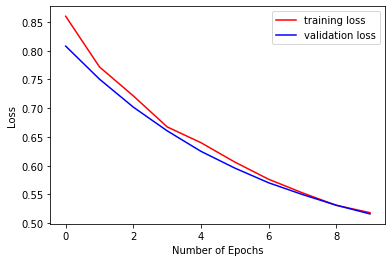

In [16]:
# Plot the loss curves for training and validation 
plt.plot(history.history['loss'], color='r', label="training loss")
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

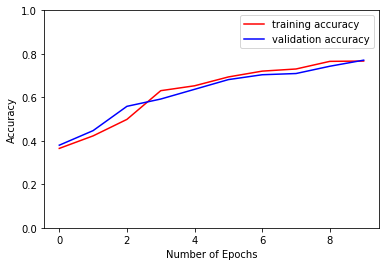

In [17]:
# Plot the accuracy curves for training and validation 
plt.plot(history.history['accuracy'], color='r', label="training accuracy")
plt.plot(history.history['val_accuracy'], color='b', label="validation accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()

### Evaluation

In [18]:
# get the prediction of the model on the test data
prediction = model.predict(X_test)
print("prediction shape: {},  dtype: {}".format(prediction.shape, prediction.dtype))
# choose whether one or zero submission
prediction_submission = (prediction > 0.5).astype(int).ravel()
print("prediction_submission shape: {},  dtype: {}".format(prediction_submission.shape, prediction_submission.dtype))

prediction shape: (418, 1),  dtype: float32
prediction_submission shape: (418,),  dtype: int64


In [19]:
# create the submission for kaggle
submission = pd.DataFrame({
    'PassengerId': df_test.index,
    'Survived': prediction_submission,
})

submission.sort_values('PassengerId', inplace=True)    
submission.to_csv('submission.csv', index=False)

### Suggistive Experiments
#### Ready Made Code blocks ready to submit

In [20]:
# import some important layers we will use to build our network
from keras.models import Model
from keras.layers import Input, Dense, Dropout, ReLU
# import the optimizer, loss functions and metrics
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.losses import BinaryCrossentropy
from keras.callbacks.tensorboard_v1 import TensorBoard

# describing the layers of the neural network
input_features = Input(shape=(7,)) # the 7 columns which is our features of the input
dense_1_out = Dense(128, activation="relu",
                    use_bias=True, 
                    kernel_initializer='glorot_normal',
                    bias_initializer='zeros',
                    kernel_regularizer=l2(1e-5))(input_features)
dense_1_drop = Dropout(0.5)(dense_1_out)
dense_2_out = Dense(64, activation="relu",
                    use_bias=True, 
                    kernel_initializer='glorot_normal',
                    bias_initializer='zeros',
                    kernel_regularizer=l2(1e-5))(dense_1_drop)
dense_2_drop = Dropout(0.25)(dense_2_out)
logits = Dense(1, activation='sigmoid')(dense_2_drop) # the prediction using sigmoid activation

# Finalizing the model by specifying the inputs and the outputs
model = Model(inputs=input_features, outputs=logits)

# Let's define our hyperparameters
learning_rate = 0.001
batch_size = 64
num_epochs = 30

# define our optimizer
optimizer = Adam(lr=learning_rate)

# compile our using our defined optimizer, binary_crossentropy loss and accuracy metric
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

# we need a visualization for loss and accuracy 
# so we gonna use tensorboard visualization from keras callbacks APIs
tensorboard_callback = TensorBoard(log_dir='./logs_moemen', batch_size=batch_size,
                                   write_graph=True, update_freq='epoch')

# training our model with our hyperparameters
# and get the history
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,
                    validation_data=(X_val,Y_val), callbacks=[tensorboard_callback], verbose=2)

# get the prediction of the model on the test data
prediction = model.predict(X_test)
print("prediction shape: {},  dtype: {}".format(prediction.shape, prediction.dtype))
# choose whether one or zero submission
prediction_submission = (prediction > 0.5).astype(int).ravel()
print("prediction_submission shape: {},  dtype: {}".format(prediction_submission.shape,
                                                           prediction_submission.dtype))

# create the submission for kaggle
submission = pd.DataFrame({
    'PassengerId': df_test.index,
    'Survived': prediction_submission,
})
submission.sort_values('PassengerId', inplace=True)    
submission.to_csv('submission_moemen.csv', index=False)

Train on 712 samples, validate on 179 samples
Epoch 1/30
 - 0s - loss: 0.6737 - accuracy: 0.5983 - val_loss: 0.6062 - val_accuracy: 0.7933
Epoch 2/30
 - 0s - loss: 0.5981 - accuracy: 0.7374 - val_loss: 0.5489 - val_accuracy: 0.7654
Epoch 3/30
 - 0s - loss: 0.5433 - accuracy: 0.7711 - val_loss: 0.5068 - val_accuracy: 0.7765
Epoch 4/30
 - 0s - loss: 0.4924 - accuracy: 0.8020 - val_loss: 0.4798 - val_accuracy: 0.7877
Epoch 5/30
 - 0s - loss: 0.4788 - accuracy: 0.7837 - val_loss: 0.4628 - val_accuracy: 0.7765
Epoch 6/30
 - 0s - loss: 0.4542 - accuracy: 0.8104 - val_loss: 0.4551 - val_accuracy: 0.7709
Epoch 7/30
 - 0s - loss: 0.4622 - accuracy: 0.7753 - val_loss: 0.4546 - val_accuracy: 0.7765
Epoch 8/30
 - 0s - loss: 0.4504 - accuracy: 0.8174 - val_loss: 0.4581 - val_accuracy: 0.7821
Epoch 9/30
 - 0s - loss: 0.4568 - accuracy: 0.8104 - val_loss: 0.4604 - val_accuracy: 0.7765
Epoch 10/30
 - 0s - loss: 0.4394 - accuracy: 0.8104 - val_loss: 0.4627 - val_accuracy: 0.7765
Epoch 11/30
 - 0s - los